In [2]:
%pip install pennylane

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pennylane as qml
import random as rd

In [4]:
import matplotlib.pyplot as plt
import numpy as np

"""
Fonction qui affiche le résultat d'un circuit sous forme de graphique.
"""
def plot_samples(samples, num_qubits):
    # Comptage des occurrences de chaque état
    counts = np.unique(samples, return_counts=True, axis=0)

    # Conversion des états binaires en entiers pour les étiquettes sur l'axe des x
    state_labels = [int("".join(str(x) for x in state), 2) for state in counts[0]]

    # Génération de toutes les combinaisons possibles d'états de qubits
    all_states = [format(i, f'0{num_qubits}b') for i in range(2**num_qubits)]

    # Filtrage des états ayant des résultats
    state_labels_with_results = [state for state in all_states if int(state, 2) in state_labels]

    # Mappage des états filtrés avec leurs occurrences
    filtered_counts = [counts[1][state_labels.index(int(state, 2))] for state in state_labels_with_results]

    # Affichage des résultats sous forme d'un diagramme à barres
    plt.bar(range(len(state_labels_with_results)), filtered_counts)
    plt.xlabel('États')
    plt.ylabel('Nombre d\'échantillons')
    plt.xticks(range(len(state_labels_with_results)), state_labels_with_results)
    plt.title('Résultats du circuit')
    plt.show()

In [5]:


class HashFunction(qml.operation.Operation):
    # Define how many wires the operator acts on in total.
    # In our case this may be one or two, which is why we
    # use the AnyWires Enumeration to indicate a variable number.
    num_wires = qml.operation.AnyWires
    
    @staticmethod
    def compute_decomposition(n,m,wires):  # pylint: disable=arguments-differ
        # Overwriting this method defines the decomposition of the new gate, as it is
        # called by Operator.decomposition().
        # The general signature of this function is (*parameters, wires, **hyperparameters).
        input_wires,output_wires = wires[:n],wires[n:2*n]
        nstates = 2**n

        
        
        for row in range(nstates):
            for column in range(nstates):
                if (m[row][column] == 1):
                    outputlist = []
                    output = f'{column:0{n}b}'
                    for i in range(n):
                        if(output[i]=='1'):
                            outputlist.append(output_wires[i])
                    for wire in outputlist : 
                        qml.MultiControlledX(input_wires,wire,f'{row:0{n}b}')


In [6]:
class Reductor(qml.operation.Operation):
    # Define how many wires the operator acts on in total.
    # In our case this may be one or two, which is why we
    # use the AnyWires Enumeration to indicate a variable number.
    num_wires = qml.operation.AnyWires
    
    @staticmethod
    def compute_decomposition(n,b,i,wires):  # pylint: disable=arguments-differ
        # Overwriting this method defines the decomposition of the new gate, as it is
        # called by Operator.decomposition().
        # The general signature of this function is (*parameters, wires, **hyperparameters).
        
        qml.CNOT(wires = (wires[i],wires[-1]))

        for c in range(len(b)):
            if b[c]=='1':
                print(wires[c])
                qml.CNOT(wires = (wires[-1],wires[c]))
        

        

[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
101 2
<Wires = ['i_0', 'i_1', 'i_2', 'o_0', 'o_1', 'o_2', 'q']>
i_0
i_2
i_0
i_2
[0 1 0 0 1 1]
[1 1 0 1 0 1]
[1 1 1 0 1 0]
[1 0 0 0 1 0]
[1 0 1 1 1 1]
[1 0 0 0 1 0]
[1 0 1 0 1 0]
[0 1 0 0 1 1]
[1 1 0 1 1 1]
[1 0 1 1 1 1]
[1 1 1 1 1 1]
[1 1 0 0 1 0]
[0 0 1 0 1 0]
[0 1 1 1 0 1]
[0 1 0 1 0 1]
[0 1 0 0 1 1]
[1 0 1 0 1 1]
[0 1 1 0 1 1]
[1 1 1 1 0 1]
[1 0 0 0 1 1]
[0 1 1 1 1 1]
[1 0 1 0 1 1]
[1 0 1 0 1 1]
[0 1 0 0 1 0]
[1 1 1 1 1 1]
[1 1 1 0 1 1]
[1 1 0 1 0 1]
[0 0 1 0 1 0]
[1 1 1 1 0 1]
[0 1 0 0 1 1]
[1 0 0 0 1 1]
[1 1 0 1 0 1]
[0 0 0 0 1 0]
[0 0 1 1 1 1]
[1 1 1 0 1 0]
[1 0 1 0 1 1]
[0 1 0 1 1 1]
[0 1 0 1 0 1]
[1 1 1 1 0 1]
[0 0 1 1 0 1]
[0 1 0 0 1 0]
[0 0 1 1 1 1]
[0 0 0 1 1 1]
[1 0 1 1 0 1]
[1 1 1 1 0 1]
[0 1 0 1 0 1]
[0 1 0 0 1 1]
[1 0 0 1 0 1]
[0 1 1 0 1 0]
[1 0 0 1 1 1]
[0 1 1 1 1 1]
[0 0 1

c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\ops\qubit\non_parametric_ops.py:2094: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


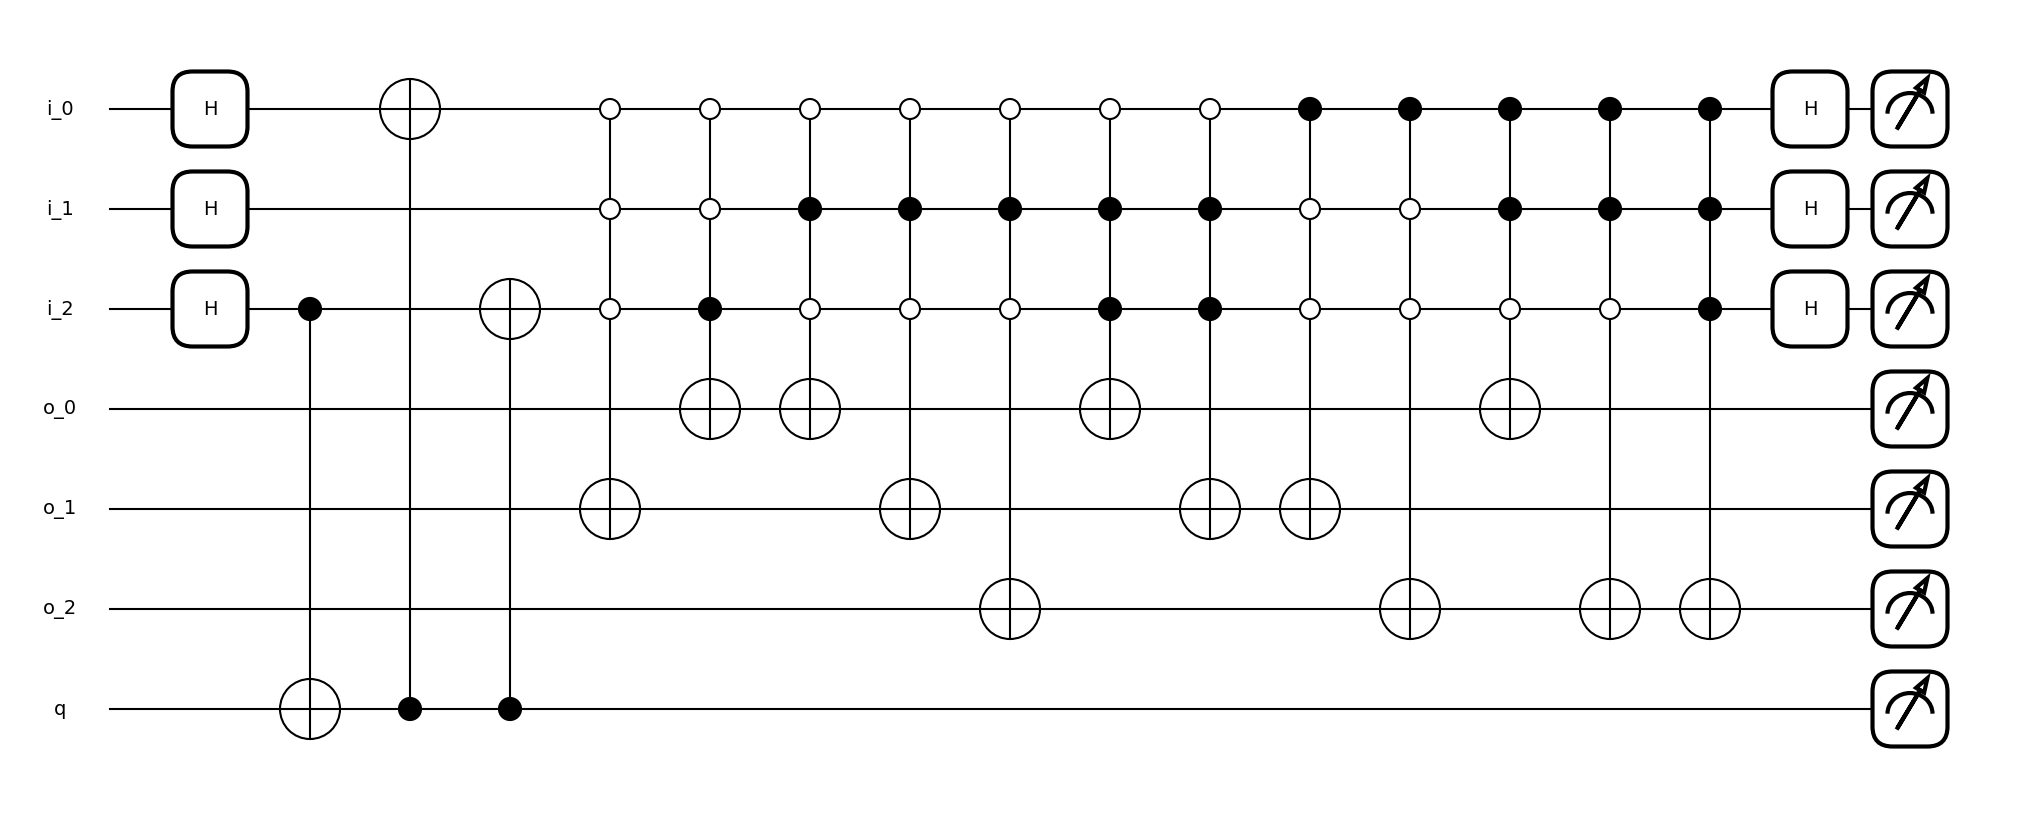

In [46]:
N = 3
dev = qml.device("default.qubit", wires=[*[f"{l}_{x}" for l in "io" for x in range(N)],"q"],shots = 100)

m = [[1 if i==j else 0 for i in range(2**N)] for j in range(2**N)]
rd.shuffle(m)
for r in m:
    print(r)

b = rd.randint(1,2**N-1)
b = f'{b:0{N}b}'
i = rd.choice([i for i in range(N) if b[i]=='1'])
print(b,i)

print(dev.wires)
# Création du circuit

@qml.qnode(dev)
@qml.compile()
def circuit():
    #qml.BasisStatePreparation([0,1,0],wires = dev.wires[:N])
    qml.broadcast(qml.Hadamard,wires = dev.wires[:N],pattern = "single")
    Reductor(N,b,i,dev.wires)
    HashFunction(N,m,dev.wires)
    qml.broadcast(qml.Hadamard,wires = dev.wires[:N],pattern = "single")

    return (qml.sample())
qml.draw_mpl(circuit)()
for i in circuit():
    print(i[:-1])

i_0
i_1


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\ops\qubit\non_parametric_ops.py:2094: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


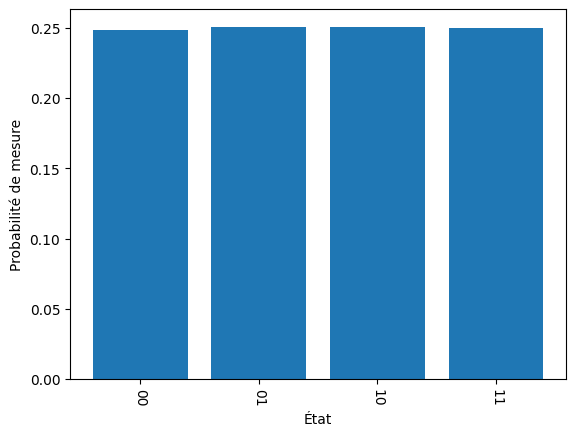

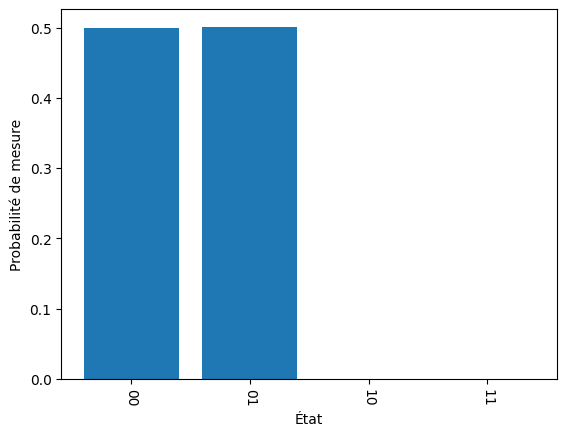

In [28]:
probs_i,probs_o = circuit()

state_labels = [format(i, '0' + str(N) + 'b') for i in range(2**(N))]
plt.bar(state_labels, probs_i)
plt.xlabel("État")
plt.ylabel("Probabilité de mesure")
plt.xticks(rotation=-90)
plt.xticks(state_labels)  # to ensure all state labels are shown
plt.show()

state_labels = [format(i, '0' + str(N) + 'b') for i in range(2**(N))]
plt.bar(state_labels, probs_o)
plt.xlabel("État")
plt.ylabel("Probabilité de mesure")
plt.xticks(rotation=-90)
plt.xticks(state_labels)  # to ensure all state labels are shown
plt.show()